In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('/content/mnist_784_csv.csv')

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
X = df.drop(columns='class').values

In [24]:
x_train,x_test = tts(X,test_size=0.2)

In [25]:
x_train = x_train/255
x_test = x_test/255

In [26]:
x_train.shape

(56000, 784)

In [27]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [28]:
x_train.shape

(56000, 28, 28, 1)

In [29]:
def add_noise(images):
  noise_factor = 0.5
  noisy_image = images + noise_factor * np.random.randn(*images.shape);
  return np.clip(noisy_image,0.,1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [34]:
def build_autoencoder():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(28*28,activation='sigmoid'))
  model.add(Reshape((28,28,1)))
  return model

In [36]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [39]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=128,validation_data=(x_test_noisy,x_test))

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0777 - val_loss: 0.0344
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0315 - val_loss: 0.0257
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0242 - val_loss: 0.0219
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0210 - val_loss: 0.0199
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0192 - val_loss: 0.0188
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0182 - val_loss: 0.0181
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0176 - val_loss: 0.0177
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0170 - val_loss: 0.0173
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167 - val_loss: 0.0170
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0164 - val_loss: 0.0169


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


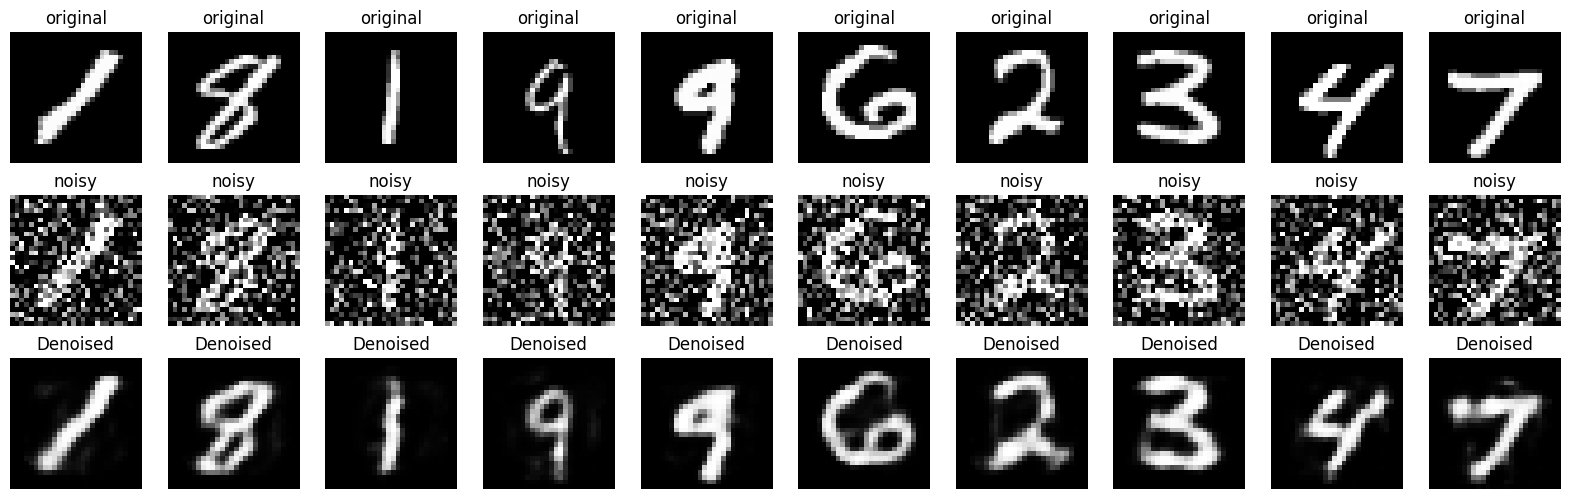

In [40]:
denoised_images = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
  ax= plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title("original")
  plt.axis('off')

  ax= plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
  plt.title("noisy")
  plt.axis('off')

  ax= plt.subplot(3,n,i+1+2*n)
  plt.imshow(denoised_images[i].reshape(28,28),cmap='gray')
  plt.title("Denoised")
  plt.axis('off')

plt.show()